In [56]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, MessagesState , START, END
from langchain_groq import ChatGroq
import requests
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.prebuilt import ToolNode, tools_condition
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
import os
from langchain_core.tools import tool

In [11]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [29]:
from langchain_community.tools import DuckDuckGoSearchRun

@tool
def search_duckduckgo(query: str):
    """Searches DuckDuckGo using LangChain's DuckDuckGoSearchRun tool."""
    
    search = DuckDuckGoSearchRun()
    
    return search.invoke(query)

In [13]:
# Example usage
result = search_duckduckgo("what are AI agent")
print(result)

An AI agent is a software component that has the agency to act on behalf of a user or a system to perform tasks.Users can organize agents into systems that can orchestrate complex workflows, coordinate activities among multiple agents, apply logic to thorny problems, and evaluate answers to user queries. Limitations of AI Agents. AI agents have undoubtedly transformed many industries, but they come with limitations that impact their reliability, adaptability, and ethical use. Here are some of the main limitations: Limited Understanding of Context Many AI agents lack the deep understanding of context that humans have. An AI agent is a software program that can interact with its surroundings, gather information, and use that information to complete tasks on its own to achieve goals set by humans.. For instance, an AI agent on an online shopping platform can recommend products, answer customer questions, and process orders. If agent needs more information, it can ask users for additional 

In [31]:
@tool
def multiply(a:int, b:int)->int:
    
    """ multiply a and b """
    
    return a*b

In [33]:
@tool
def add(a:int, b:int)->int:
    
    """ adds a and b """
    
    return a+b

In [43]:
load_dotenv()
api_key = os.getenv("GROQ_API_KEY")

# 1. Instantiate Groq LLM and Wikipedia tool
llm = ChatGroq(model="llama3-70b-8192", api_key=api_key)

In [44]:
llm.invoke("hello !").content

"Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?"

In [53]:
tools = [search_duckduckgo, multiply, add]

llm_with_tools = llm.bind_tools(tools,tool_choice="auto")

In [54]:
def chatbot(state: State):
    
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [57]:
graph_builder = StateGraph(State)

## define nodes

graph_builder.add_node("assistant", chatbot)
graph_builder.add_node("tools",ToolNode(tools))

## define edges
graph_builder.add_edge(START, "assistant")
graph_builder.add_conditional_edges("assistant",tools_condition)
graph_builder.add_edge("tools","assistant")

react_graph = graph_builder.compile()

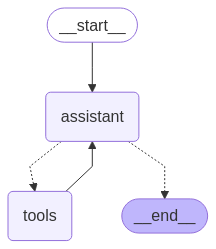

In [58]:
# To see the graph’s connection visually

display(Image(react_graph.get_graph().draw_mermaid_png()))

In [59]:
response = react_graph.invoke({"messages": [HumanMessage(content="what is the weather in delhi. Multiply it by 2 and add 5.")]})
print(response["messages"])
     

[HumanMessage(content='what is the weather in delhi. Multiply it by 2 and add 5.', additional_kwargs={}, response_metadata={}, id='4e859393-3d1c-4d08-bf6b-5b296c786ac8'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_490n', 'function': {'arguments': '{"query":"weather in delhi"}', 'name': 'search_duckduckgo'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 49, 'prompt_tokens': 1153, 'total_tokens': 1202, 'completion_time': 0.176187354, 'prompt_time': 0.037690792, 'queue_time': 0.074782371, 'total_time': 0.213878146}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-849ad729-5daf-44e3-99d8-06f9efd48da0-0', tool_calls=[{'name': 'search_duckduckgo', 'args': {'query': 'weather in delhi'}, 'id': 'call_490n', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1153, 'output_tokens': 49, 'total_tokens': 1202}), ToolMessage(content="New Delhi, India - Curre

In [61]:
response = react_graph.invoke({"messages": [HumanMessage(content="what is ai agent?")]})
print(response["messages"])

[HumanMessage(content='what is ai agent?', additional_kwargs={}, response_metadata={}, id='dff9fefa-b0b2-4eff-9514-6bec0c954632'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_n35b', 'function': {'arguments': '{"query":"ai agent"}', 'name': 'search_duckduckgo'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 1140, 'total_tokens': 1187, 'completion_time': 0.149556095, 'prompt_time': 0.037377017, 'queue_time': 0.054399460999999996, 'total_time': 0.186933112}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-acf2bee3-9cfe-4cf8-8700-d8070c202cf6-0', tool_calls=[{'name': 'search_duckduckgo', 'args': {'query': 'ai agent'}, 'id': 'call_n35b', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1140, 'output_tokens': 47, 'total_tokens': 1187}), ToolMessage(content="Limitations of AI Agents. AI agents have undoubtedly transformed many i